In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
import pickle

In [5]:
X=pickle.load(open('X.pkl','rb'))
y=pickle.load(open('y.pkl','rb'))

In [6]:
X=X/255

In [7]:
X.shape

(25000, 100, 100, 3)

In [9]:
model=Sequential()

model.add(Conv2D(64,(3,3),activation='relu',input_shape=(X.shape[1:])))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(2,activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 64)       

In [11]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [12]:
history=model.fit(X,y,epochs=20,validation_split=0.1,callbacks=[early_stop])

Train on 22500 samples, validate on 2500 samples
Epoch 1/20
22500/22500 [==============================] - 421s 19ms/sample - loss: 0.6400 - accuracy: 0.6112 - val_loss: 0.5689 - val_accuracy: 0.6960
Epoch 2/20
22500/22500 [==============================] - 445s 20ms/sample - loss: 0.5275 - accuracy: 0.7322 - val_loss: 0.5244 - val_accuracy: 0.7260
Epoch 3/20
22500/22500 [==============================] - 408s 18ms/sample - loss: 0.4706 - accuracy: 0.7734 - val_loss: 0.4271 - val_accuracy: 0.7940
Epoch 4/20
22500/22500 [==============================] - 422s 19ms/sample - loss: 0.4237 - accuracy: 0.8021 - val_loss: 0.4230 - val_accuracy: 0.8020
Epoch 5/20
22500/22500 [==============================] - 410s 18ms/sample - loss: 0.3888 - accuracy: 0.8242 - val_loss: 0.3887 - val_accuracy: 0.8156
Epoch 6/20
22500/22500 [==============================] - 405s 18ms/sample - loss: 0.3575 - accuracy: 0.8392 - val_loss: 0.3589 - val_accuracy: 0.8364
Epoch 7/20
22500/22500 [=====================

In [16]:
import matplotlib.pyplot as plt
def plotLearningCurve(history,epochs):
    epochRange = range(1,epochs+1)
    plt.plot(epochRange,history.history['accuracy'])
    plt.plot(epochRange,history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train','Validation'])
    plt.show()

    plt.plot(epochRange,history.history['loss'])
    plt.plot(epochRange,history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train','Validation'])
    plt.show()

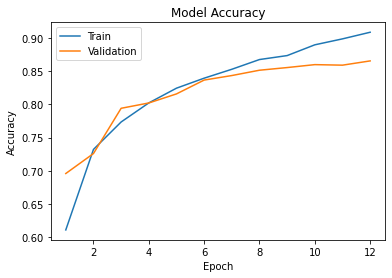

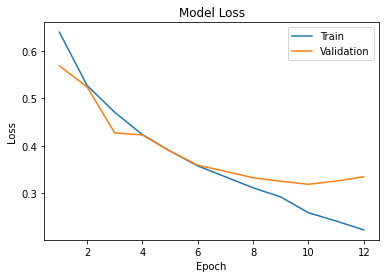

In [17]:
plotLearningCurve(history,12)